# Farm Plots Fixed EDA

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
pd.set_option('display.max_columns', 500)

## Load and explore data

In [3]:
farm_plots = gpd.read_file('../data/farm_plots_fixed/Sioma_complex_farms_2017_20_fixed.shp')

In [4]:
farm_plots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
farm_plots.shape

(1153, 51)

In [6]:
farm_plots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1153 non-null   int64   
 1   Join_Count  1153 non-null   int64   
 2   TARGET_FID  1153 non-null   int64   
 3   OBJECTID_1  1153 non-null   float64 
 4   globalid    343 non-null    object  
 5   Date        343 non-null    object  
 6   Farmers_na  1045 non-null   object  
 7   Village_na  1107 non-null   object  
 8   Community_  888 non-null    object  
 9   Gender_typ  328 non-null    object  
 10  Head_of_ho  329 non-null    object  
 11  Profits_fr  320 non-null    object  
 12  Non_Agricu  256 non-null    object  
 13  Profits_No  286 non-null    object  
 14  Fellumbus   331 non-null    object  
 15  Fellumbus_  118 non-null    object  
 16  Fellumbus1  1153 non-null   float64 
 17  Post_Harve  318 non-null    object  
 18  Post_Har_1  1153 non-null   float64 
 19

In [7]:
farm_plots.head()

,OBJECTID,Join_Count,TARGET_FID,OBJECTID_1,globalid,Date,Farmers_na,Village_na,Community_,Gender_typ,Head_of_ho,Profits_fr,Non_Agricu,Profits_No,Fellumbus,Fellumbus_,Fellumbus1,Post_Harve,Post_Har_1,Post_Har_2,Coorparati,Training,Type_of_Tr,Number_of_,Training_o,HWC,HWC_loss,Loss_Harve,Loss_Units,Species,Data_colle,CreationDa,EditDate,ObjectID_2,GlobalID_1,Crop_Type,Size_of_fi,Method,Conservati,Total_Harv,Units,Intial_inv,ParentGlob,Creation_1,EditDate_1,x,y,Year,Shape_Leng,Shape_Area,geometry
0,1,1,1,0.0,None,None,None,Mate,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,1.0,None,Maize,None,Conservation Agriculture,None,3.0,bags,None,None,None,None,23.369345,-17.649308,2017.0,0.000506,1.535485e-08,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369..."
1,2,1,2,0.0,None,None,None,Chivula,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,2.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.369696,-17.648855,2017.0,0.000656,2.659136e-08,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369..."
2,3,1,3,0.0,None,None,None,Mbala,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,3.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.428358,-17.619148,2017.0,0.008660,3.750012e-06,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428..."
3,4,1,4,0.0,None,None,None,Kachanchi,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,4.0,None,Maize,None,Conservation Agriculture,None,4.0,bags,None,None,None,None,23.412410,-17.595901,2017.0,0.004561,9.504647e-07,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412..."
4,5,1,5,0.0,None,None,None,Kachanchi,None,None,None,None,None,None,None,None,0.0,None,0.0,None,None,None,None,0.0,None,None,None,0.0,None,None,None,None,None,5.0,None,Maize,None,Conservation Agriculture,None,5.0,bags,None,None,None,None,23.411034,-17.593672,2017.0,0.003678,5.153094e-07,"POLYGON Z ((23.41085 -17.59339 0.00000, 23.411..."


<AxesSubplot:>

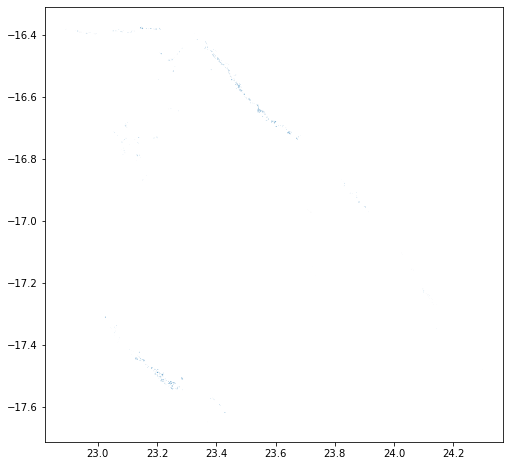

In [8]:
farm_plots.plot(figsize=(12,8))

## Explore features

In [9]:
def plot_frequencies(df, feature):
    df[feature].fillna('unknown').value_counts().plot.bar(title='Feature: {}'.format(feature))
    plt.ylabel('Number of observations')

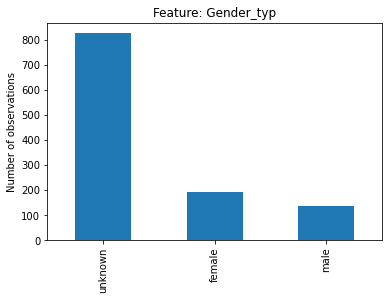

In [10]:
plot_frequencies(farm_plots, 'Gender_typ')

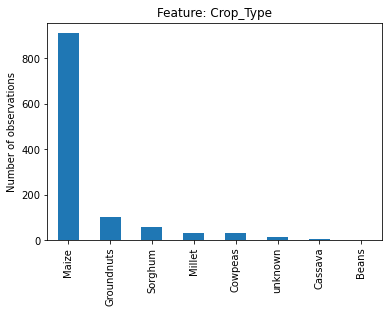

In [11]:
plot_frequencies(farm_plots, 'Crop_Type')

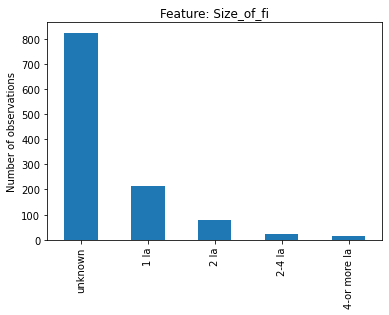

In [12]:
plot_frequencies(farm_plots, 'Size_of_fi')

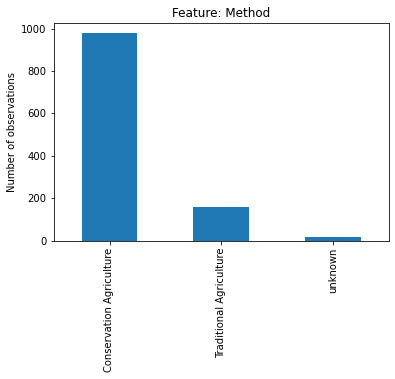

In [13]:
plot_frequencies(farm_plots, 'Method')

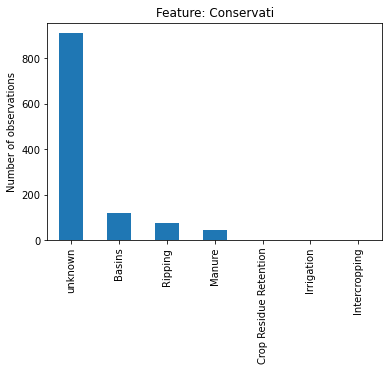

In [14]:
plot_frequencies(farm_plots, 'Conservati')

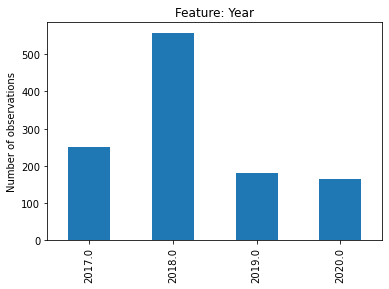

In [15]:
farm_plots['Year'].fillna('unknown').value_counts().sort_index().plot.bar(title='Feature: {}'.format('Year'))
plt.ylabel('Number of observations')
plt.show()

### Explore dates

In [16]:
farm_plots['Date'].fillna('unknown').value_counts().head()

unknown       810
2019-11-23     25
2019-10-12     22
2019-10-21     18
2019-10-15     18
Name: Date, dtype: int64

In [17]:
farm_plots['CreationDa'].fillna('unknown').value_counts().head()

unknown       810
2020-01-07    136
2019-11-29     82
2019-12-18     53
2019-11-25     26
Name: CreationDa, dtype: int64

In [18]:
farm_plots['EditDate'].fillna('unknown').value_counts().head()

unknown       810
2020-01-07    136
2019-11-29     82
2019-12-18     53
2019-11-25     26
Name: EditDate, dtype: int64

In [19]:
farm_plots['Creation_1'].fillna('unknown').value_counts().head()

unknown                 810
1/7/2020 11:05:47 AM      1
1/7/2020 12:08:58 PM      1
1/7/2020 12:14:16 PM      1
1/7/2020 11:04:34 AM      1
Name: Creation_1, dtype: int64

In [20]:
farm_plots['EditDate_1'].fillna('unknown').value_counts().head()

unknown                 810
1/7/2020 11:05:47 AM      1
1/7/2020 12:08:58 PM      1
1/7/2020 12:14:16 PM      1
1/7/2020 11:04:34 AM      1
Name: EditDate_1, dtype: int64

**It seems as if the only reliable date information is contained in the column 'Year' since all other columns that are supposed to contain dates seem to contain no or not complete date information.**

## Map farm plots

In [21]:
farm_plots_2017 = farm_plots[farm_plots['Year'] == 2017].reset_index(drop=True)
farm_plots_2018 = farm_plots[farm_plots['Year'] == 2018].reset_index(drop=True)
farm_plots_2019 = farm_plots[farm_plots['Year'] == 2019].reset_index(drop=True)
farm_plots_2020 = farm_plots[farm_plots['Year'] == 2020].reset_index(drop=True)

In [22]:
locations_2017 = farm_plots_2017[['y', 'x']]
locations_list_2017 = locations_2017.values.tolist()

locations_2018 = farm_plots_2018[['y', 'x']]
locations_list_2018 = locations_2018.values.tolist()

locations_2019 = farm_plots_2019[['y', 'x']]
locations_list_2019 = locations_2019.values.tolist()

locations_2020 = farm_plots_2020[['y', 'x']]
locations_list_2020 = locations_2020.values.tolist()

In [23]:
%%time

map = folium.Map(location=[-17.0, 23.4], zoom_start=9)

title = 'Farm Plot Locations in the Kavango Zambezi Conservation Area'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             <p align="center"> <font color="green">Green=</font>2017; <font color="red">Red=</font>2018; <font color="blue">Blue=</font>2019; <font color="orange">Orange=</font>2020 </p>
             '''.format(title)

map.get_root().html.add_child(folium.Element(title_html))

for point in range(0, len(locations_list_2017)):
    folium.Circle(locations_list_2017[point], color='green', radius=5, label='test').add_to(map)

for point in range(0, len(locations_list_2018)):
    folium.Circle(locations_list_2018[point], color='red', radius=5).add_to(map)

for point in range(0, len(locations_list_2019)):
    folium.Circle(locations_list_2019[point], color='blue', radius=5).add_to(map)

for point in range(0, len(locations_list_2020)):
    folium.Circle(locations_list_2020[point], color='orange', radius=5).add_to(map)

map

CPU times: user 47.1 ms, sys: 0 ns, total: 47.1 ms
Wall time: 46 ms


In [24]:
map.save('farm_plots_fixed_locations_by_year.html')

## Save years and locations

In [25]:
farm_plots['Year'] = farm_plots['Year'].astype(int)

In [26]:
farm_plots = farm_plots.rename(columns={'Year': 'year'})

In [27]:
farm_plots[['year', 'geometry']].to_file('data/farm_plots_fixed_locations.shp')

/home/alex/anaconda3/envs/farm_plots/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
